# 1. Import các thư viện cần thiết và đọc data

In [1]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = 'data_output/all_articles.csv'
print(PATH)

data_output/all_articles.csv


In [3]:
data = pd.read_csv(PATH).drop_duplicates()
data = data.reset_index(drop=True)
data

,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6m,19m,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,"10,5 tỷ",148,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5m,30m,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...","6,8 tỷ",80,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5m,16m,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38 tỷ,462,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14m,33m,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6m,20m,2.0,3.0,yes,yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,Cặp Đất đường 15m Kinh Dương Vương. Cách biển ...,"15,99 tỷ",198,m²,Đường Kinh Dương Vương,Phường Hòa Khánh,Đà Nẵng,2025-10-30,17319529,Đông Bắc,...,Sổ hồng/ Sổ đỏ,9m,22m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3911,"ĐẤT NÀY MÌNH CHÍNH CHỦ BÁN VỊ TRÍ ĐẸP, DT 237M...","2,7 tỷ",237,m²,NaN,Phường Tân Thành,Hồ Chí Minh,2025-10-30,10899761,NaN,...,Sổ hồng/ Sổ đỏ,"9,6m","24,7m",NaN,NaN,NaN,NaN,NaN,NaN,yes
3912,Siêu phẩm mới tinh giá tốt nhất thị trường.Lô ...,"3,1 tỷ",73,m²,NaN,Phường Thiên Hương,Hải Phòng,2025-10-30,17390612,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3913,"Hiếm! Tòa CHDV Triều Khúc, 95m2*8T, MT 5M, 28 ...","15,9 tỷ",95,m²,Đường Triều Khúc,Phường Thanh Xuân,Hà Nội,2025-10-30,14415098,NaN,...,NaN,NaN,NaN,8.0,28.0,NaN,NaN,NaN,NaN,NaN


# 1.1. Chuẩn hóa đơn vị

In [4]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Xem phân bố nhãn đơn vị

In [5]:
data['unit'].value_counts()

unit
m²    3915
Name: count, dtype: int64

Chuẩn hóa số, đơn vị tính toán

In [6]:
def extract_number(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    value = value.replace(",", ".")
    value = value.split('m')[0].strip()
    try:
        return float(value)
    except ValueError:
        return np.nan


def feature_preprocessing(data):
    """Hàm tiền xử lý, chuẩn hóa cho dữ liệu thô"""

    data = data.copy()

    # Chuẩn hóa giá tiền price
    price_pre = []
    for index, price  in enumerate(data['price']):

        if 'triệu / m²' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * data['size'][index]) # Nếu xuất hiện đơn vị triệu / m², nhân nó với cột chứa size (m²)
        elif 'tỷ' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * 1000) # Nếu đơn vị là tỷ, quy về triệu
        elif 'triệu' in price:
            price_pre.append(float(price.replace(",", ".").split()[0])) # Nếu đã là triệu, thêm trực tiếp
        elif 'Thỏa thuận' in price:
            pass
        else:
            print(price, type(price))
            print(data['size'][index], type(data['size'][index]))
            pass
    
    data['price'] = pd.Series(price_pre)

    # Trích xuất số cho các cột số bị lẫn đơn vị văn bản
    cols_need_extract = ['road_width', 'width', 'length']
    for col in cols_need_extract:
        data[col] = data[col].apply(extract_number)

    data = data.dropna(subset=['price'])

    # Chuyển feature đơn vị data['size'] về dạng float, xử lý với các kiểu dữ liệu không thể chuyển được qua (drop), cụ thể là sample 43.000.000
    data['size'] = pd.to_numeric(data['size'], errors='coerce')
    data = data.dropna(subset=['size'])

    data = data.reset_index(drop=True)

    return data

In [7]:
data = feature_preprocessing(data)
data.head()

9 ngàn <class 'str'>
32 <class 'str'>


,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,10500.0,148.0,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...",6800.0,80.0,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38000.0,462.0,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


# 2. EDA phân tích data

In [8]:
data = data.drop(['title', 'post_id', 'unit', 'time_update', 'listing_type'], axis=1)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3900 non-null   float64
 1   size             3900 non-null   float64
 2   streetAddress    3602 non-null   object 
 3   addressLocality  3886 non-null   object 
 4   addressRegion    3900 non-null   object 
 5   direction        949 non-null    object 
 6   road_width       3687 non-null   float64
 7   property_type    3900 non-null   object 
 8   legal_documents  2992 non-null   object 
 9   width            3175 non-null   float64
 10  length           2612 non-null   float64
 11  num_floors       2737 non-null   float64
 12  num_bedrooms     2756 non-null   float64
 13  has_dining_room  1404 non-null   object 
 14  has_kitchen      1422 non-null   object 
 15  has_rooftop      1225 non-null   object 
 16  has_parking      1310 non-null   object 
 17  is_owner      

In [10]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,3.900000e+03,3900.000000,3687.000000,3175.000000,2612.000000,2737.000000,2756.000000
mean,2.331481e+04,127.749270,11.432167,7.833106,21.414654,4.360248,6.719884
std,5.999174e+04,125.202595,22.283107,12.262633,17.275174,4.429301,12.538460
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.599750e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.300000e+03,90.000000,7.500000,5.000000,19.000000,3.000000,4.000000
75%,1.999925e+04,140.000000,14.000000,8.000000,23.500000,5.000000,6.000000
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000


In [11]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,3.900000e+03,3900.000000,3687.000000,3175.000000,2612.000000,2737.000000,2756.000000
mean,2.331481e+04,127.749270,11.432167,7.833106,21.414654,4.360248,6.719884
std,5.999174e+04,125.202595,22.283107,12.262633,17.275174,4.429301,12.538460
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.599750e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.300000e+03,90.000000,7.500000,5.000000,19.000000,3.000000,4.000000
75%,1.999925e+04,140.000000,14.000000,8.000000,23.500000,5.000000,6.000000
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000


Kiểm tra phân bố giá trị missing value

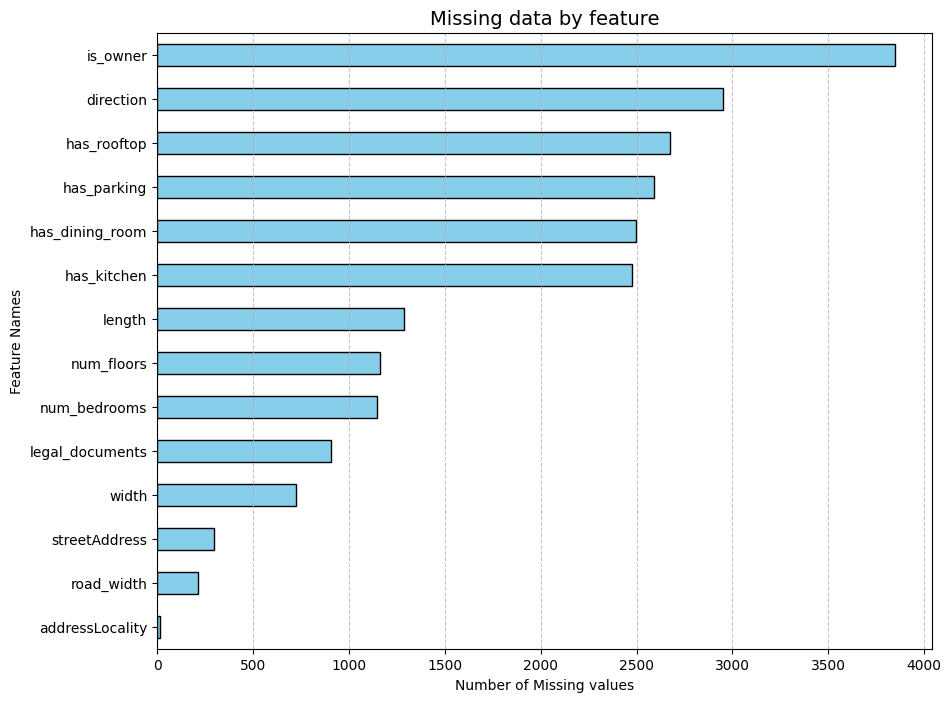

In [12]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color="skyblue", edgecolor="black")
plt.title("Missing data by feature", fontsize=14)
plt.xlabel("Number of Missing values")
plt.ylabel("Feature Names")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Biểu đổ ma trận tương quan thể hiện mức độ tương quan giữa các biến số trong tập dữ liệu:
- Tông xanh thể hiện tương quan âm
- Tông đỏ thể hiện tưởng quan dương

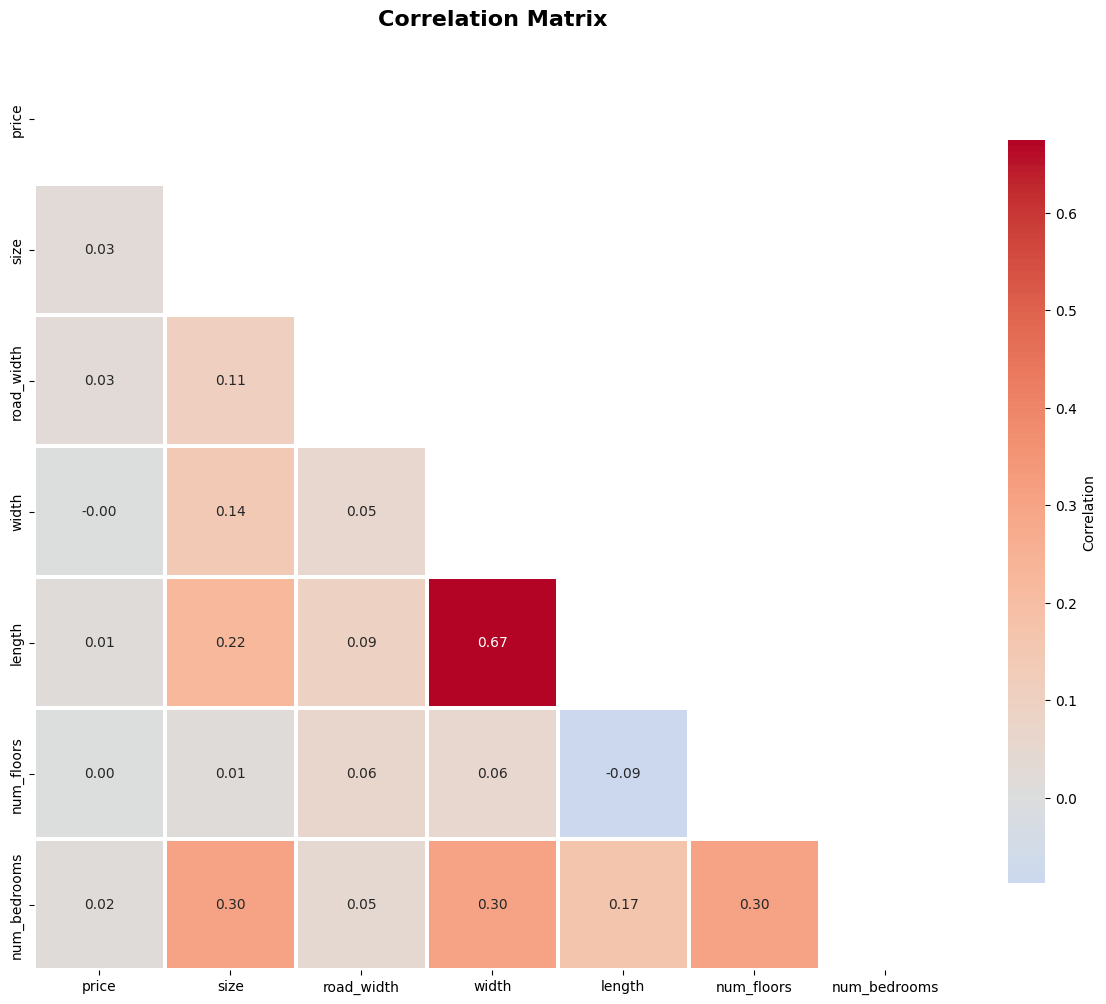

In [13]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True, linewidths=1.5,
           cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('Correlation Matrix',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [14]:
corr_feature_2price = data.corr(numeric_only=True)['price'].sort_values(ascending=False)[1:]
corr_feature_2price

road_width      0.028155
size            0.028037
num_bedrooms    0.016337
length          0.014896
num_floors      0.000353
width          -0.000788
Name: price, dtype: float64

In [15]:
data['price_per_unit'] = data['price'] / data['size']
data['price_per_unit'].head()

0     5.250000
1    70.945946
2    85.000000
3    82.251082
4     5.416667
Name: price_per_unit, dtype: float64

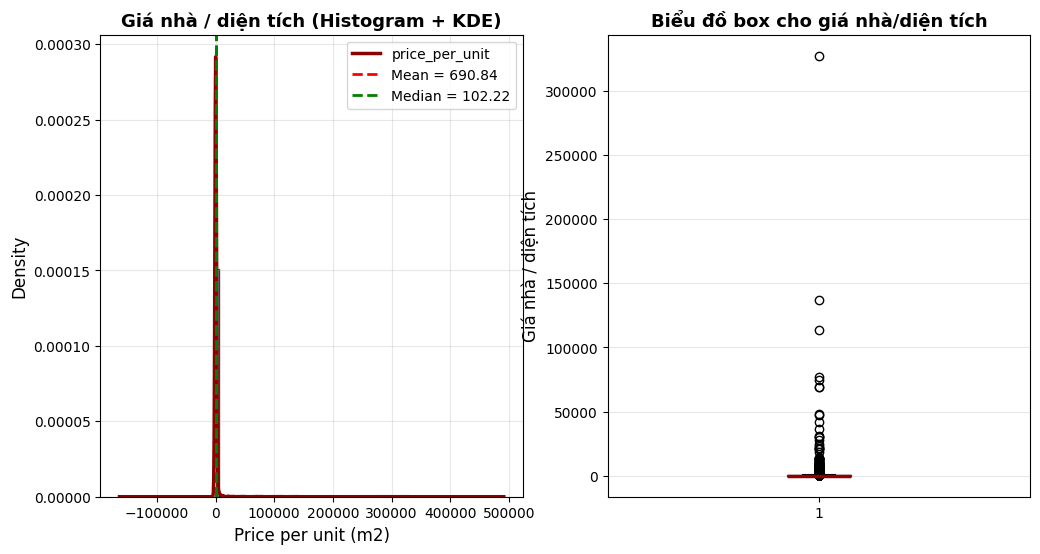

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(data['price_per_unit'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price_per_unit'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(data['price_per_unit'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data['price_per_unit'].mean():.2f}')
axes[0].axvline(data['price_per_unit'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data['price_per_unit'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Giá nhà / diện tích (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Boxplot
bp = axes[1].boxplot(data['price_per_unit'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



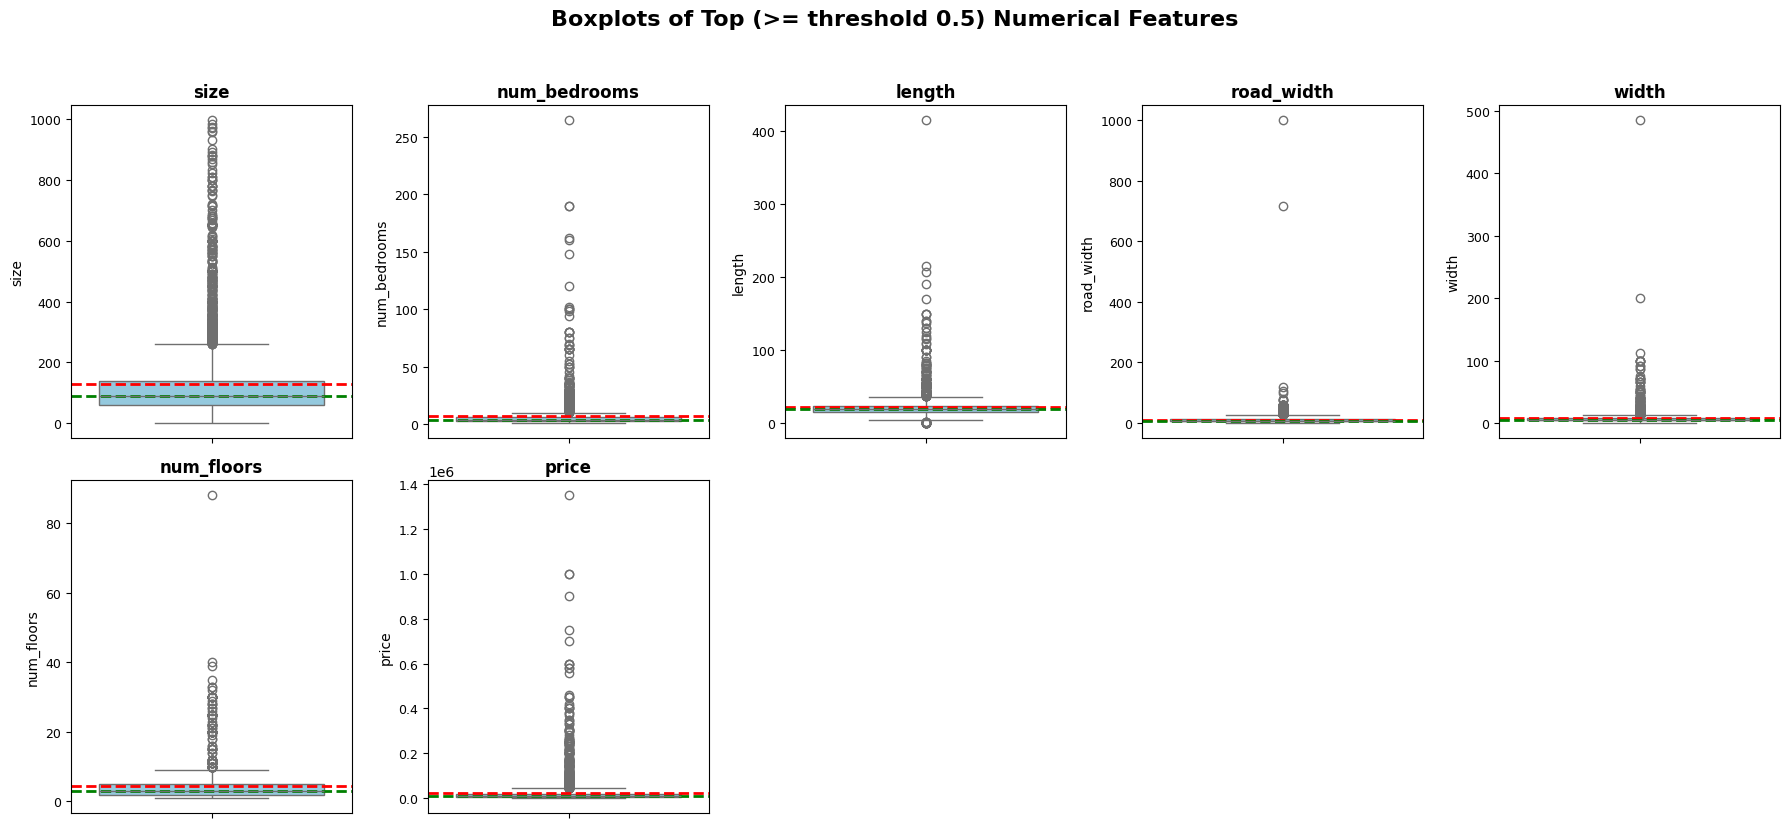

In [17]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()



📈 SCATTER PLOTS: FEATURES vs PRICE


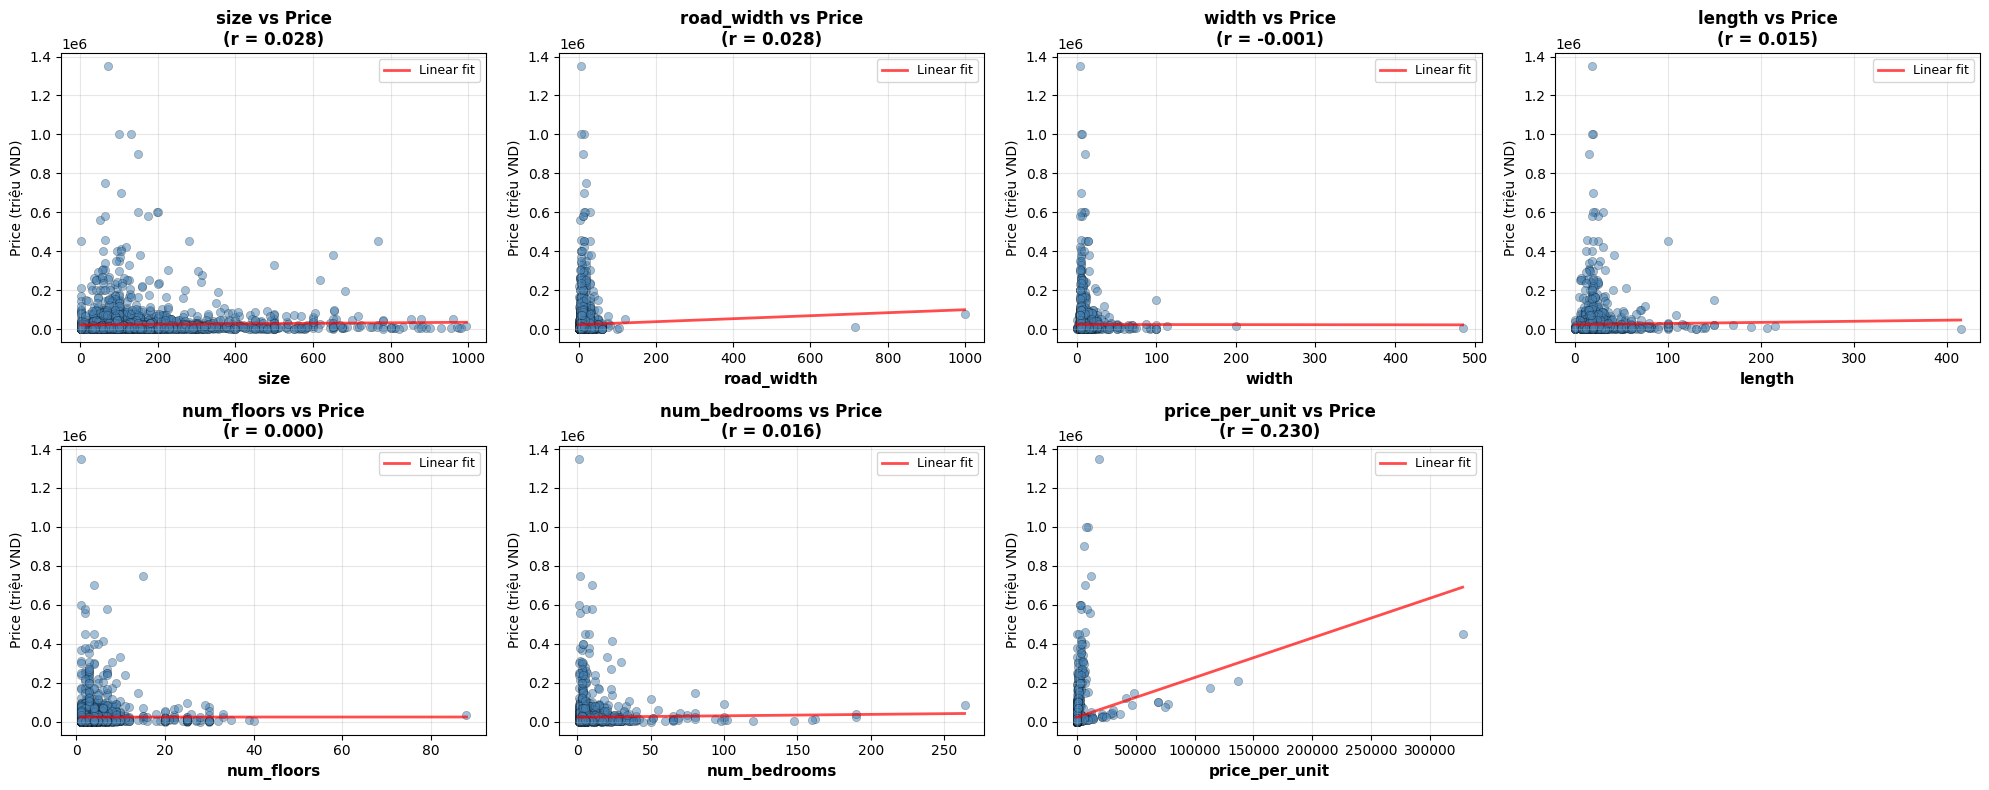

In [18]:
print("\n" + "=" * 80)
print("📈 SCATTER PLOTS: FEATURES vs PRICE")
print("=" * 80)

# Lấy tất cả các cột trừ cột target 'price'
features = list(data.drop('price', axis=1).columns)

# Lọc ra chỉ các cột số để vẽ scatter plot
numeric_features = [feat for feat in features if pd.api.types.is_numeric_dtype(data[feat])]

# Tính toán số hàng và cột cho subplot
num_features = len(numeric_features)
num_cols = 4  # Số cột tối đa cho biểu đồ
num_rows = (num_features + num_cols - 1) // num_cols # Đảm bảo đủ hàng

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for idx, feat in enumerate(numeric_features):
    # Scatter plot
    axes[idx].scatter(data[feat], data['price'], alpha=0.5, s=35,
                     color='steelblue', edgecolor='k', linewidth=0.3)

    # Thêm regression line (linear) - chỉ khi có đủ phương sai và dữ liệu
    # Lọc bỏ NaN cho việc tính toán polyfit
    temp_data = data[[feat, 'price']].dropna()
    if len(temp_data) > 1 and temp_data[feat].nunique() > 1: 
        z = np.polyfit(temp_data[feat], temp_data['price'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(temp_data[feat].min(), temp_data[feat].max(), 100)
        axes[idx].plot(x_line, p(x_line), 'r-', linewidth=2, alpha=0.7, label='Linear fit')

    # Correlation
    corr = data[feat].corr(data['price'])

    # Labels và title
    axes[idx].set_xlabel(feat, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Price (triệu VND)', fontsize=10)
    axes[idx].set_title(f'{feat} vs Price\n(r = {corr:.3f})',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

# Ẩn các subplot không sử dụng nếu có
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Với boxplot, ta nhận định:
- Với diện tích, diện tích hộp nằm ở vị trí rất thấp và các giá trị cực đoan có thể kéo dài lên tận 1000 m2, với bối cảnh ở việt nam thì 300m2 đã là rất lớn, thường dành cho biệt thự hoặc nhà phố có quy mô lớn
- Cột giá nhà cho thấy phân phối rất lệch, phần lớn giá tập trungở mức thấp, nhà bình thường hiếm khi có giá cao và các giá cao hầu như đại diện cho bất động sản ở vị trí kim cương hoặc dinh thự, điều này không hợp lý với dự đoán giá nhà thông thường 
- Các giá trị ở các cột chiều dài, rộng, chiều rộng đường cũng có khá nhiều giá trị ngoại lai, khi các outlier kéo rất dài và có thể là các lô đất nông nghiệp thương mại rất lớn, không phù hợp cho bài toán dự đoán giá nhà dân dụng

# 3. Tiền xử lý dữ liệu

In [19]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler


import matplotlib.pyplot as plt
import seaborn as sns

Chuẩn hóa cột giá trị bool về nhị phân thay vì yes, no

In [20]:
def bool_to_num(sample):
    if sample == 'yes':
        return 1


cols_bool = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
for col in cols_bool:
    data[col] = data[col].apply(bool_to_num)

data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner,price_per_unit
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,NaN,5.250000
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,70.945946
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,85.000000
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,82.251082
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,5.416667


Drop cột bị thiếu quá nhiều giá trị: 
- is_owner: Bị thiếu quá 95%
- direction: Bị thiếu quá 70%

In [21]:
data = data.drop(['is_owner', 'direction'], axis=1)

### Tách riêng 2 tập train/test và nhãn

In [22]:
train_df, test_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [23]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,price_per_unit
247,27900.0,66.0,Đường Gia Thượng,Phường Bồ Đề,Hà Nội,8.0,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,6.6,10.00,NaN,NaN,NaN,NaN,NaN,NaN,422.727273
2591,1450.0,88.0,Đường Văn Phương,Phường Tân Triều,Đồng Nai,6.0,Nhà mặt tiền,NaN,NaN,NaN,2.0,3.0,1.0,1.0,NaN,1.0,16.477273
1822,97000.0,60.0,Đường Trần Duy Hưng,Phường Yên Hòa,Hà Nội,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,1616.666667
3483,8000.0,120.0,Đường Trường Chinh,Phường Phương Liệt,Hà Nội,10.0,Nhà mặt tiền,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN,66.666667
2771,258000.0,71.0,Đường Lê Thanh Nghị,Phường Hòa Cường,Đà Nẵng,10.0,Nhà mặt tiền,NaN,5.0,14.14,3.0,3.0,NaN,NaN,NaN,NaN,3633.802817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,73.0,55.0,Quốc lộ 1A,Xã Mỹ Yên,Tây Ninh,30.0,Căn hộ chung cư,Sổ hồng/ Sổ đỏ,6.0,9.00,20.0,2.0,NaN,NaN,NaN,NaN,1.327273
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0,65.517241
860,49000.0,73.0,Đường Vũ Bảo,Phường Quy Nhơn Nam,Gia Lai,16.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.7,NaN,1.0,2.0,NaN,NaN,NaN,NaN,671.232877
3507,14.5,170.0,Đường Lê Văn Sỹ,Phường Nhiêu Lộc,Hồ Chí Minh,8.0,Nhà trong hẻm,NaN,8.8,20.00,3.0,5.0,NaN,NaN,NaN,NaN,0.085294


Về giá nhà/m2: Do phát hiện có ngoại lai RẤT LỚN là, tức 1000 tỷ/m2, hay các giá trị như 0.01 triệu/m2, nên giá trị này rất vô lý, có khẳ năng là lỗi nhập liệu
- Nên sẽ  tiến hành loại bỏ lỗi outlier CỰC ĐOAN
- Giá nhà trung bình ở việt nam thấp nhất là khoảng 16-25 triệu/m2
- Giá các căn nhà cao cấp ở việt nam cao nhất cùng lắm 1 tỷ/m2 hiện tại 

Theo điều 27 nghị định 100/2024/NĐ-CP có ghi rõ, nhà đất như nhà chung cư phải đáp ưng đủ tối thiếu là 25m2 để đảm bảo quy hoạch xây dựng co cơ quan nhà nước có thẩm quyền phê duyệt (Nguồn: https://luatvietnam.vn/dat-dai-nha-o/nha-o-xa-hoi-567-30110-article.html)
- Về cột kích thước, ta có thể thấy có bài đăng có kích thước rất bé là 1 m2, điều này là bất hợp lý vì diện tích bé nhất (nhà ở xã hội) do luật đất đai quy định cũng bé ít nhất là 25m2 
- Về số tầng, Số tầng nhà cao nhất  VN cũng chỉ ~81 tầng (Landmark 81), nhưng bài dự đoán cho nhà bình thường, không phải chung cư hoặc nhà cao cấp nên bình thường gía trị sẽ ở khoảng 7 - 10 tầng
- Về số phòng ngủ, các nhà bình thường cùng lắm chỉ có 12 phòng ngủ là nhiềunhiều


In [24]:
def rule_base_preprocess(data):
    data = data.copy()
    # Loại bỏ dữ liệu có giá nhà/unit quá cao, nghi do lỗi nhập liệu
    data = data[(data['price_per_unit'] > 16) & (data['price_per_unit'] < 1000)]
    # Theo quy định, ta có thể loại bỏ áp dụng cho toàn bộ nhà đất
    data = data[data['size'] >= 25]
    # Trong thực tế, rất khó có nhà có số ngủ quá lớn mà chỉ giới hạn nhiều nhất khoảng 10 - 12 phòng ngủ, nếu trên có khả năng là nhà quá to hoặc chung cư
    data = data[data['num_bedrooms'] <= 12]
    # Các nhà biệt thự cùng lắm cũng chỉ 7 - 10 tầng, nếu cao hơn cũng có khả năng nhưng chủ yếu là các tòa nhà chung cư lớn
    data = data[data['num_floors'] < 10]

    data = data.drop(['price_per_unit'], axis=1)

    return data

In [25]:
# Áp dụng cho cả tập train và test
train_df = rule_base_preprocess(train_df)
test_df = rule_base_preprocess(test_df)

In [26]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2591,1450.0,88.0,Đường Văn Phương,Phường Tân Triều,Đồng Nai,6.0,Nhà mặt tiền,NaN,NaN,NaN,2.0,3.0,1.0,1.0,NaN,1.0
3483,8000.0,120.0,Đường Trường Chinh,Phường Phương Liệt,Hà Nội,10.0,Nhà mặt tiền,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN
3691,9500.0,85.0,Đường Nguyễn Thiện Kế,Phường An Hải,Đà Nẵng,5.5,Nhà mặt tiền,NaN,4.0,20.0,3.0,4.0,NaN,NaN,NaN,NaN
3058,29500.0,98.0,Đường Đinh Thị Hòa,Phường An Hải,Đà Nẵng,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.5,19.0,5.0,11.0,NaN,NaN,NaN,NaN
2630,4600.0,43.0,Đường Dương Văn Bé,Phường Vĩnh Tuy,Hà Nội,5.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,16700.0,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
3772,12600.0,45.0,Phố Cù Chính Lan,Phường Khương Đình,Hà Nội,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0
860,49000.0,73.0,Đường Vũ Bảo,Phường Quy Nhơn Nam,Gia Lai,16.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.7,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [27]:
test_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
321,3850.0,85.0,Đường Nguyễn Sơn Hà,Phường Hà Đông,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,5.0,6.0,1.0,1.0,1.0,1.0
3187,10000.0,51.0,Đường Xuân Đỉnh,Phường Xuân Đỉnh,Hà Nội,10.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,14.5,4.0,4.0,1.0,1.0,1.0,1.0
366,21000.0,48.0,Quốc Lộ 5,Phường Hồng Bàng,Hải Phòng,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,12.0,4.0,4.0,NaN,NaN,NaN,NaN
1749,11500.0,87.0,Đường Xuân Thới Thượng 72,Xã Bà Điểm,Hồ Chí Minh,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,20.0,2.0,2.0,1.0,1.0,1.0,1.0
3887,3700.0,73.0,Đường Lý Thường Kiệt,Phường Tân Hòa,Hồ Chí Minh,8.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.3,17.0,4.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,45000.0,57.0,Phố Hàng Phèn,Phường Hoàn Kiếm,Hà Nội,20.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,3.5,18.0,4.0,3.0,NaN,NaN,NaN,NaN
1885,6000.0,40.0,Đường Lê Quang Đạo,Phường Từ Liêm,Hà Nội,2.5,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,3.0,1.0,1.0,1.0,1.0
1382,46000.0,253.0,Đường Phạm Ngọc Thạch,Phường Xuân Hòa,Hồ Chí Minh,20.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,11.0,23.0,4.0,4.0,NaN,NaN,NaN,NaN
1393,20000.0,143.0,Đường Lê Văn Sỹ,Phường Tân Sơn Hòa,Hồ Chí Minh,20.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,8.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN


In [28]:
train_df.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
count,1564.000000,1564.000000,1548.000000,1319.000000,1076.000000,1564.000000,1564.000000,792.0,801.0,699.0,703.0
mean,16126.637468,106.000000,10.061047,6.033343,17.766626,3.386189,4.296675,1.0,1.0,1.0,1.0
std,19542.828229,89.840778,8.944544,3.203663,7.538054,1.731634,2.201951,0.0,0.0,0.0,0.0
min,550.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,5850.000000,60.000000,5.000000,4.200000,13.362500,2.000000,3.000000,1.0,1.0,1.0,1.0
50%,10300.000000,82.000000,7.000000,5.000000,17.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
75%,18999.250000,115.250000,12.000000,6.500000,20.075000,5.000000,5.000000,1.0,1.0,1.0,1.0
max,300000.000000,960.000000,80.000000,36.000000,109.000000,9.000000,12.000000,1.0,1.0,1.0,1.0


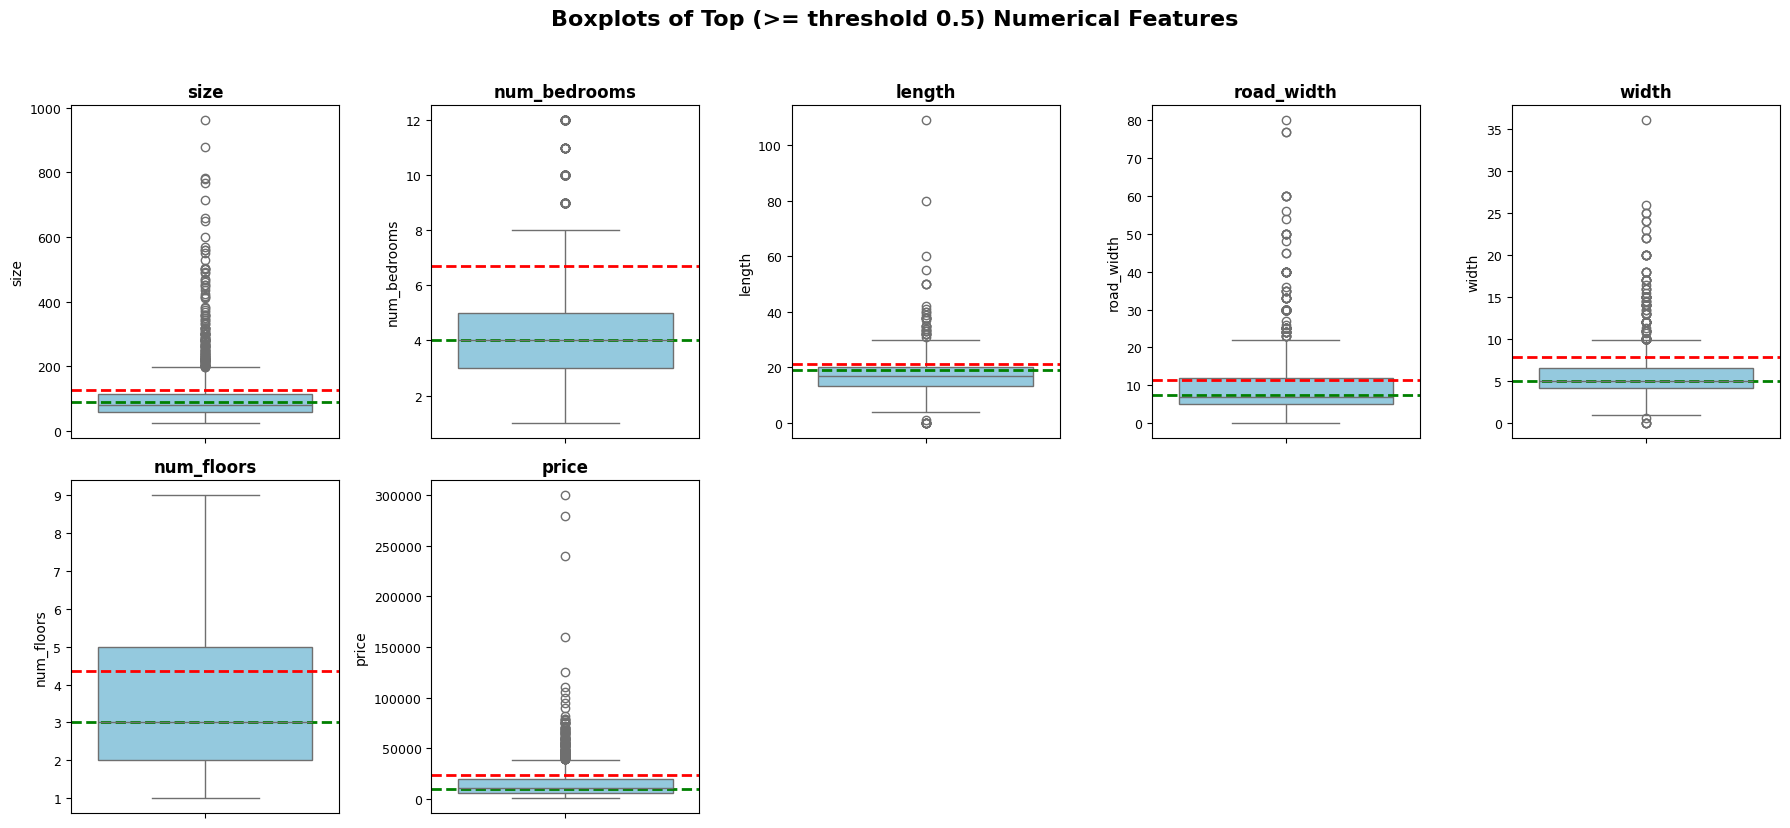

In [29]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


#### Xử lý dữ liệu ngoại lai bằng phương pháp IQR

Sau khi plot biểu đồ box, ta có thể thấy dễ dàng các cột feature numberic đang có rất nhiều dữ liệu ngoại lai, bao gồm cả gột target, điều này có 2 ý nghĩa:
- Nếu dữ liệu là thật, 1 số điểm dữ liệu outlier có thể giúp mô hình khái quát tốt hơn với các trường hợp giá nhà cao cấp và dự đoán tốt hơn nếu trong tương lai gặp
- Hoặc ngược lại, các outlier là lỗi nhập liệu, dữ liệu giả chỉ nhập vào mà nếu mua người mau sẽ liên hệ trực tiếp qua người bán và giả thuyết cũng đang thiên về
  - Ví dụ: Giá nhà 999tỷ, mô tả có ghi liên hệ với người bán (chỉ là ví dụ cho những trường hợp có liên quan)

<br>

Nên ta sẽ sử lý outlier với các cột ['price']

In [30]:
def remove_outlier_with_IQR(train_df, test_df, col_names, LowerFence, UpperFence):
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    for col_idx, col in enumerate(col_names):
        # Fit trên tập train 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - LowerFence * IQR
        upper_bound = Q3 + UpperFence * IQR 

        # Transform cho cả train và test
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
        test_df = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]

    return train_df, test_df

In [31]:
col_have_outlier = ['price', 'size']

In [32]:
train_df, test_df = remove_outlier_with_IQR(train_df, test_df, col_names=col_have_outlier, LowerFence=1.5, UpperFence=1.5)
train_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2591,1450.0,88.0,Đường Văn Phương,Phường Tân Triều,Đồng Nai,6.0,Nhà mặt tiền,NaN,NaN,NaN,2.0,3.0,1.0,1.0,NaN,1.0
3483,8000.0,120.0,Đường Trường Chinh,Phường Phương Liệt,Hà Nội,10.0,Nhà mặt tiền,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN
3691,9500.0,85.0,Đường Nguyễn Thiện Kế,Phường An Hải,Đà Nẵng,5.5,Nhà mặt tiền,NaN,4.0,20.0,3.0,4.0,NaN,NaN,NaN,NaN
3058,29500.0,98.0,Đường Đinh Thị Hòa,Phường An Hải,Đà Nẵng,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.5,19.0,5.0,11.0,NaN,NaN,NaN,NaN
2630,4600.0,43.0,Đường Dương Văn Bé,Phường Vĩnh Tuy,Hà Nội,5.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,22000.0,80.0,Đường Nguyễn Minh Hoàng,Phường Bảy Hiền,Hồ Chí Minh,10.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
3092,16700.0,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
3772,12600.0,45.0,Phố Cù Chính Lan,Phường Khương Đình,Hà Nội,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0


In [33]:
test_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
321,3850.0,85.0,Đường Nguyễn Sơn Hà,Phường Hà Đông,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,5.0,6.0,1.0,1.0,1.0,1.0
3187,10000.0,51.0,Đường Xuân Đỉnh,Phường Xuân Đỉnh,Hà Nội,10.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,14.5,4.0,4.0,1.0,1.0,1.0,1.0
366,21000.0,48.0,Quốc Lộ 5,Phường Hồng Bàng,Hải Phòng,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,12.0,4.0,4.0,NaN,NaN,NaN,NaN
1749,11500.0,87.0,Đường Xuân Thới Thượng 72,Xã Bà Điểm,Hồ Chí Minh,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,20.0,2.0,2.0,1.0,1.0,1.0,1.0
3887,3700.0,73.0,Đường Lý Thường Kiệt,Phường Tân Hòa,Hồ Chí Minh,8.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.3,17.0,4.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,12000.0,54.0,Đường Phạm Hồng Thái,Phường Bến Thành,Hồ Chí Minh,40.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0,NaN,NaN,NaN,NaN
1744,5000.0,50.0,Đường An Hưng 1,Phường Dương Nội,Hà Nội,30.0,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,5.2,9.8,7.0,7.0,NaN,NaN,NaN,NaN
1885,6000.0,40.0,Đường Lê Quang Đạo,Phường Từ Liêm,Hà Nội,2.5,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,3.0,1.0,1.0,1.0,1.0
1393,20000.0,143.0,Đường Lê Văn Sỹ,Phường Tân Sơn Hòa,Hồ Chí Minh,20.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,8.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN


Hiển thị box để xem phân phối dữ liệu sau khi xử lý IQR

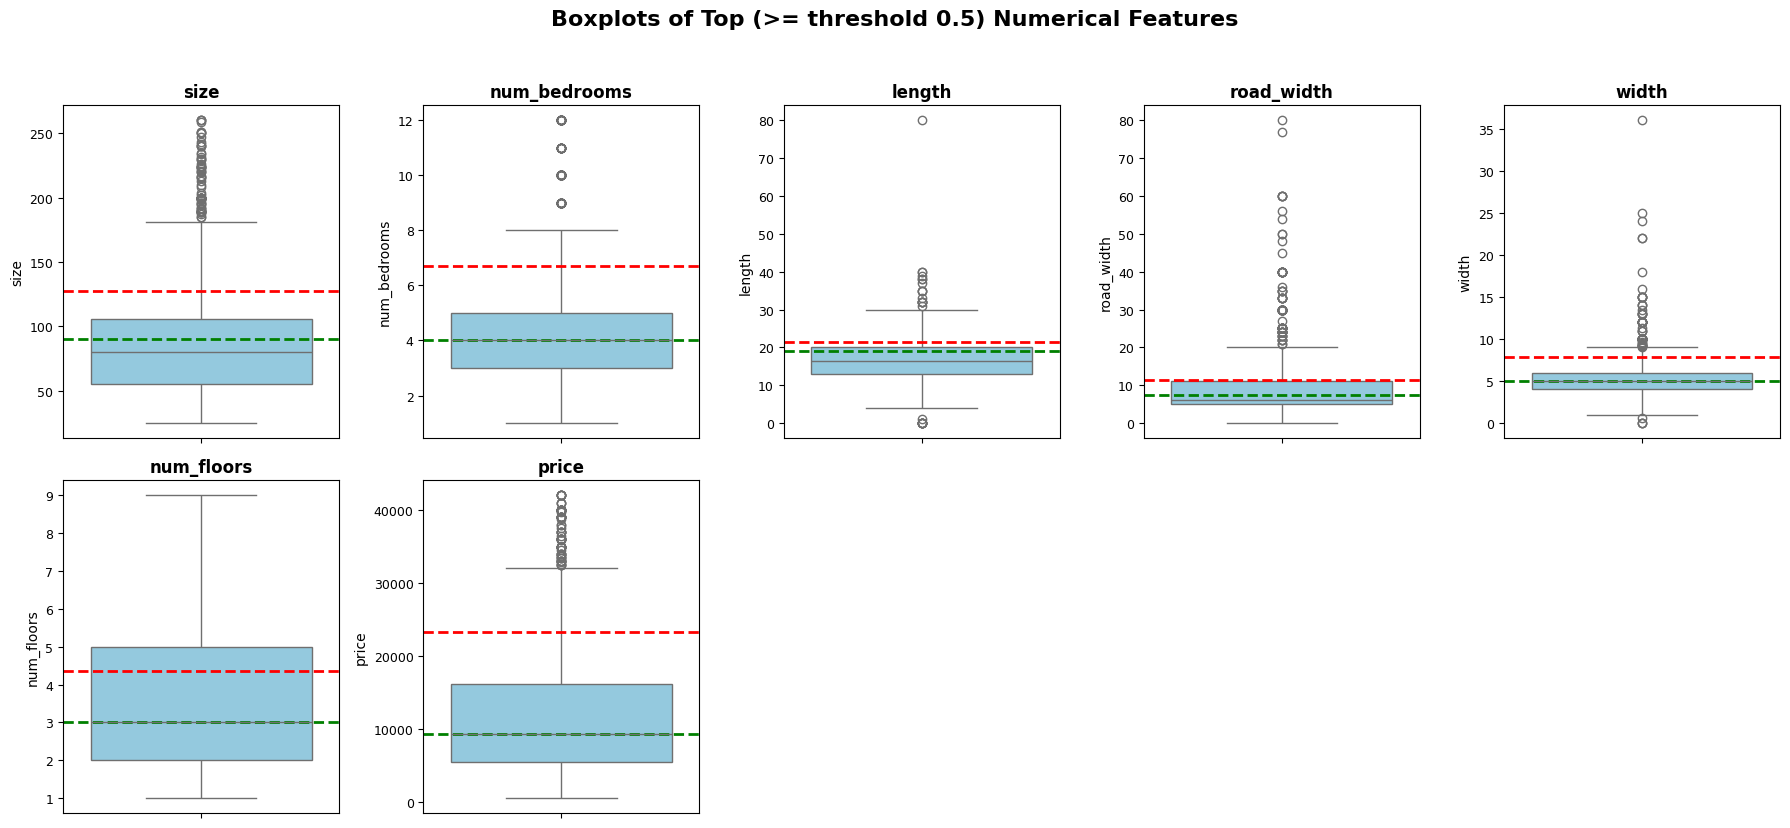

In [34]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


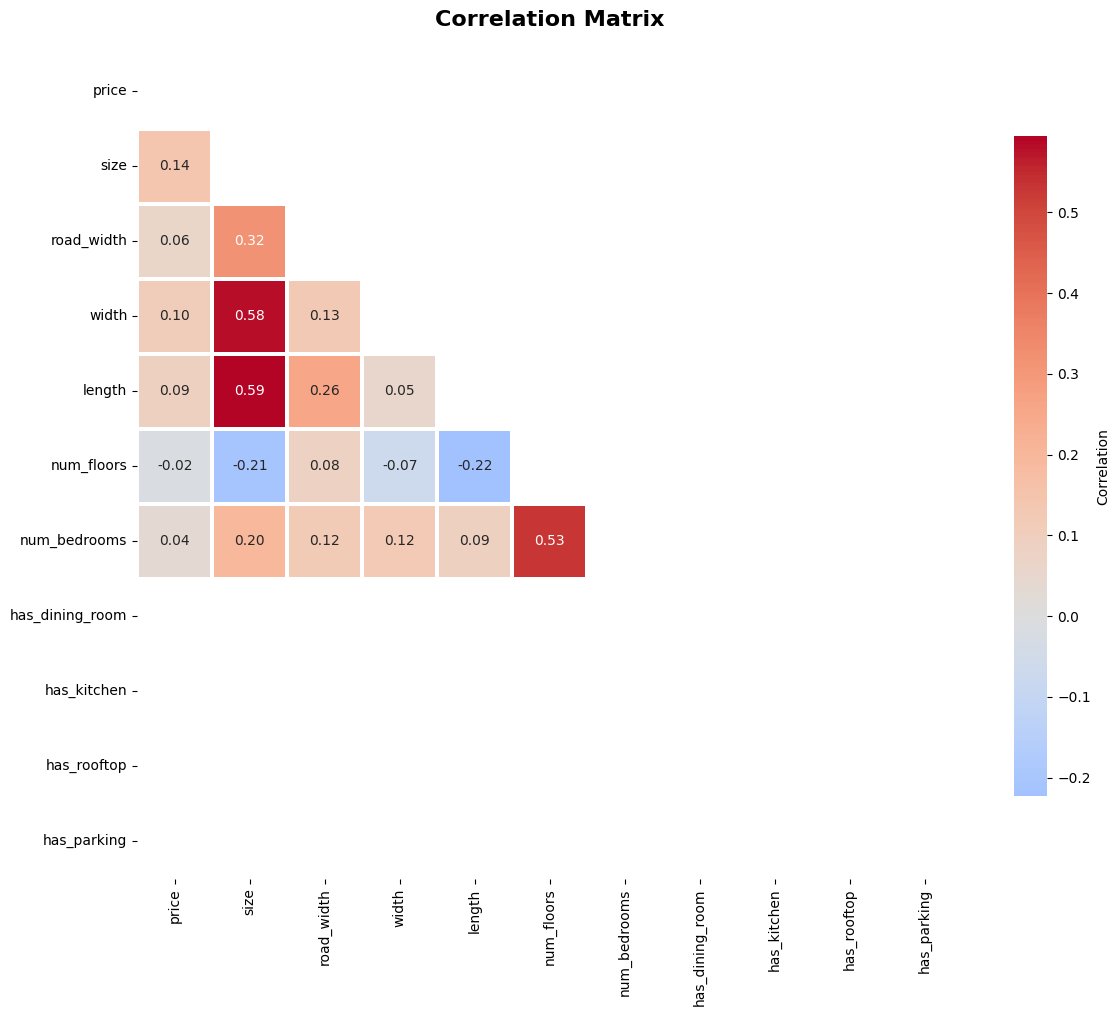

In [35]:
corr_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True, linewidths=1.5,
           cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('Correlation Matrix',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

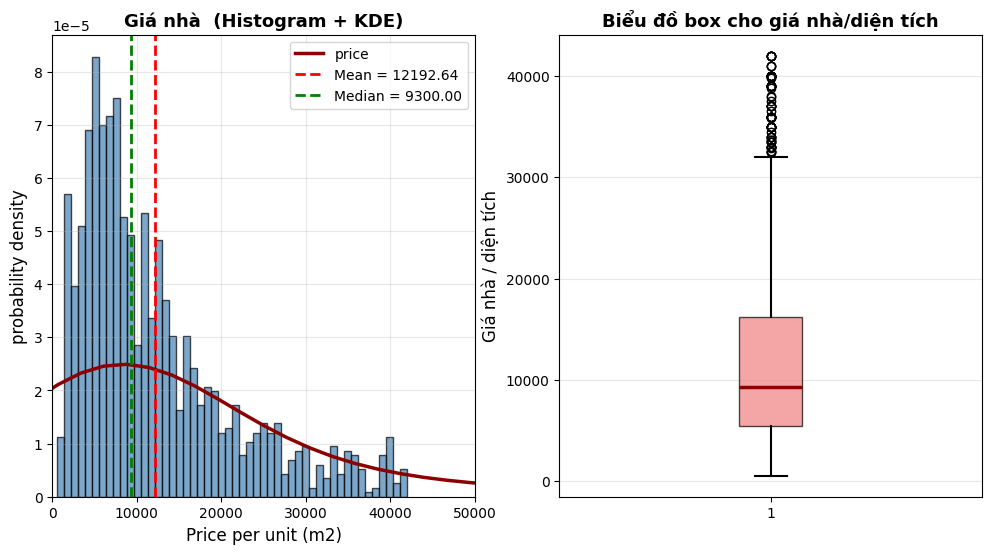

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50000

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



#### Chuẩn hóa phân phối chuẩn graussin

Vì phân phối cột target luôn dương, tức giá nhà luôn dương và phân phối bị lệch sang trái là chủ yếu, ta thử chiến lược chuẩn hóa phân phối Box-Cox hoặc Yeo-Johnson

In [37]:
from sklearn.preprocessing import PowerTransformer

skewed = PowerTransformer(method='box-cox', standardize=False)

# Fit cho dữ liệu train và transform cho dữ liệu test
train_df['price'] = skewed.fit_transform(train_df['price'].values.reshape(-1, 1))
test_df['price'] = skewed.transform(test_df['price'].values.reshape(-1, 1))


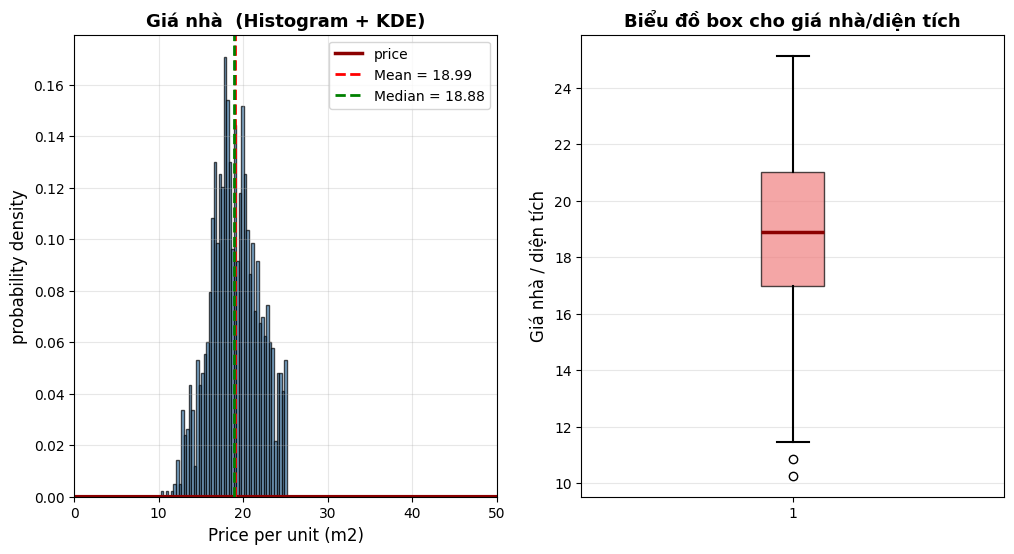

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



In [39]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2591,12.833753,88.0,Đường Văn Phương,Phường Tân Triều,Đồng Nai,6.0,Nhà mặt tiền,NaN,NaN,NaN,2.0,3.0,1.0,1.0,NaN,1.0
3483,18.331208,120.0,Đường Trường Chinh,Phường Phương Liệt,Hà Nội,10.0,Nhà mặt tiền,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN
3691,18.962637,85.0,Đường Nguyễn Thiện Kế,Phường An Hải,Đà Nẵng,5.5,Nhà mặt tiền,NaN,4.0,20.0,3.0,4.0,NaN,NaN,NaN,NaN
3058,23.539328,98.0,Đường Đinh Thị Hòa,Phường An Hải,Đà Nẵng,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.5,19.0,5.0,11.0,NaN,NaN,NaN,NaN
2630,16.400495,43.0,Đường Dương Văn Bé,Phường Vĩnh Tuy,Hà Nội,5.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,22.282213,80.0,Đường Nguyễn Minh Hoàng,Phường Bảy Hiền,Hồ Chí Minh,10.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
3092,21.148248,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
3772,20.034683,45.0,Phố Cù Chính Lan,Phường Khương Đình,Hà Nội,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN
1294,18.962637,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1398 entries, 2591 to 3174
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1398 non-null   float64
 1   size             1398 non-null   float64
 2   streetAddress    1369 non-null   object 
 3   addressLocality  1397 non-null   object 
 4   addressRegion    1398 non-null   object 
 5   road_width       1382 non-null   float64
 6   property_type    1398 non-null   object 
 7   legal_documents  1082 non-null   object 
 8   width            1176 non-null   float64
 9   length           950 non-null    float64
 10  num_floors       1398 non-null   float64
 11  num_bedrooms     1398 non-null   float64
 12  has_dining_room  727 non-null    float64
 13  has_kitchen      736 non-null    float64
 14  has_rooftop      645 non-null    float64
 15  has_parking      636 non-null    float64
dtypes: float64(11), object(5)
memory usage: 185.7+ KB


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 321 to 3751
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            365 non-null    float64
 1   size             365 non-null    float64
 2   streetAddress    360 non-null    object 
 3   addressLocality  363 non-null    object 
 4   addressRegion    365 non-null    object 
 5   road_width       362 non-null    float64
 6   property_type    365 non-null    object 
 7   legal_documents  292 non-null    object 
 8   width            298 non-null    float64
 9   length           241 non-null    float64
 10  num_floors       365 non-null    float64
 11  num_bedrooms     365 non-null    float64
 12  has_dining_room  200 non-null    float64
 13  has_kitchen      202 non-null    float64
 14  has_rooftop      180 non-null    float64
 15  has_parking      171 non-null    float64
dtypes: float64(11), object(5)
memory usage: 48.5+ KB


#### Fill missing value bằng các chiến lược cụ thể với từng feature

In [42]:
from sklearn.impute import SimpleImputer, KNNImputer

In [43]:
# Thử drop các cột mang giá trị bool
bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking']
train_df = train_df.drop(bool_cols, axis=1)
test_df = test_df.drop(bool_cols, axis=1)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1398 entries, 2591 to 3174
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1398 non-null   float64
 1   size             1398 non-null   float64
 2   streetAddress    1369 non-null   object 
 3   addressLocality  1397 non-null   object 
 4   addressRegion    1398 non-null   object 
 5   road_width       1382 non-null   float64
 6   property_type    1398 non-null   object 
 7   legal_documents  1082 non-null   object 
 8   width            1176 non-null   float64
 9   length           950 non-null    float64
 10  num_floors       1398 non-null   float64
 11  num_bedrooms     1398 non-null   float64
dtypes: float64(7), object(5)
memory usage: 142.0+ KB


In [45]:
# Các category feature có ý nghĩa vị trí và tài liệu quan trọng, drop các cột không mang vị trí
loc_cols = ['streetAddress', 'addressLocality', 'addressRegion']
train_df = train_df.dropna(subset=loc_cols)
test_df = test_df.dropna(subset=loc_cols)
# Cột categori như 'legal_documents' được fill bằng nonenone

cat_cols = ['legal_documents']
train_df[cat_cols] = train_df[cat_cols].fillna('none')
test_df[cat_cols] = test_df[cat_cols].fillna('none')

# Fillna các continue feature bằng chiến lược, ta sẽ thử impute giá tị thiếu bằng SimpleImputer hoặc KNNImputer
num_cols = ['road_width', 'width', 'length']
# Imputer_numberic = KNNImputer(n_neighbors=5)
# train_df[num_cols] = Imputer_numberic.fit_transform(train_df[num_cols])
# test_df[num_cols] = Imputer_numberic.transform(test_df[num_cols])
train_df = train_df.dropna(subset=num_cols)
test_df = test_df.dropna(subset=num_cols)


# Fillna các feature dạng số tầng, số phòng ngủ, ta sẽ thử fillna bằng chiến lược mode
floor_cols = ['num_floors', 'num_bedrooms']
Imputer_mode = SimpleImputer(strategy='most_frequent')
train_df[floor_cols] = Imputer_mode.fit_transform(train_df[floor_cols])
test_df[floor_cols] = Imputer_mode.transform(test_df[floor_cols])

# # Fillna các feature giá trị bool, giá trị 0 có thể coi là không biết
# bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking']
# train_df[bool_cols] = train_df[bool_cols].fillna(0)
# test_df[bool_cols] = test_df[bool_cols].fillna(0)


train_df = train_df.dropna(subset=['price'])
test_df = test_df.dropna(subset=['price'])


In [46]:
train_df.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,19.020670,93.376344,10.075699,5.539559,16.958806,3.316129,4.354839
std,2.897733,46.754728,9.075618,2.399526,6.161310,1.669410,2.200133
min,10.869407,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,17.015049,60.000000,5.000000,4.000000,13.000000,2.000000,3.000000
50%,18.962637,83.000000,7.000000,5.000000,16.500000,3.000000,4.000000
75%,20.976073,110.000000,12.000000,6.000000,20.000000,4.000000,5.000000
max,25.125185,260.000000,80.000000,36.000000,80.000000,9.000000,12.000000


Téch riêng nhãn và data riêng

In [47]:

X_train = train_df.drop(['price'], axis=1)
X_test = test_df.drop(['price'], axis=1)

y_train = train_df['price'].values 
y_test = test_df['price'].values 



In [48]:
print(len(X_train))
print(len(X_test))

930
234


In [49]:
X_train.head()

,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms
3691,85.0,Đường Nguyễn Thiện Kế,Phường An Hải,Đà Nẵng,5.5,Nhà mặt tiền,none,4.0,20.0,3.0,4.0
3058,98.0,Đường Đinh Thị Hòa,Phường An Hải,Đà Nẵng,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.5,19.0,5.0,11.0
1116,135.0,Đường Nguyễn Văn Thủ,Phường Tân Định,Hồ Chí Minh,7.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,8.0,16.0,3.0,5.0
2093,60.0,Đường Vũ Xuân Thiều,Phường Phúc Lợi,Hà Nội,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,12.0,7.0,4.0
2620,98.0,Đường Huỳnh Văn Nghệ,Phường Biên Hòa,Đồng Nai,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,7.0,14.0,2.0,4.0


Lọc ra các category quan trọng để giữ lại, còn lại cho vào "Other" để tránh curse of dimention

In [50]:
# def reduce_categories(data, col, threshold=100):
#     """Giữ lại top N categories, gộp còn lại thành 'Other'"""
#     value_counts = data[col].value_counts()
#     top_categories = value_counts.head(threshold).index
#     data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
#     return data

# # Áp dụng trước khi One-Hot Encoding
# for col in ['streetAddress', 'addressLocality', 'addressRegion']:
#     data = reduce_categories(data, col, threshold=50)  # Chỉ giữ 50 giá trị phổ biến nhất

In [51]:
X_train_og = X_train.copy()
X_test_og = X_test.copy()

In [52]:
X_train = X_train.drop(['legal_documents', 'streetAddress'], axis=1)
X_test = X_test.drop(['legal_documents', 'streetAddress'], axis=1)

Mã hóa 1hot-encoder với các feature dạng categorical

In [53]:
# # cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'property_type', 'legal_documents']
# cat_cols = ['property_type']
# OneHot = OneHotEncoder(
#     handle_unknown="ignore",
#     sparse_output=False
# )
# OneHot.fit(X_train[cat_cols])

# OneHot_cols = list(OneHot.get_feature_names_out(cat_cols))

# X_train[OneHot_cols] = OneHot.transform(X_train[cat_cols])
# X_test[OneHot_cols] = OneHot.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_test = X_test.drop(cat_cols, axis=1)

# X_train_encode = X_train.copy()
# X_test_encode = X_test.copy()


thử encode categories feature bầng target encoder, với mục tiêu encode thành 1 cột qua mean label để tránh curse of dimension

In [54]:
# from category_encoders import TargetEncoder

# cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
# target_encoder = TargetEncoder(cols=cat_cols)
# X_train_encoded = target_encoder.fit_transform(X_train[cat_cols], y_train)
# X_test_encoded = target_encoder.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_train = pd.concat([X_train, X_train_encoded], axis=1)

# X_test = X_test.drop(cat_cols, axis=1)
# X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [55]:
from category_encoders import CatBoostEncoder

# Chọn các cột categorical để encode
catboost_cat_cols = ['addressLocality', 'addressRegion', 'property_type']

# Khởi tạo encoder
catboost_encoder = CatBoostEncoder(cols=catboost_cat_cols, return_df=True)

# Fit và transform trên tập train, transform trên tập test
X_train[catboost_cat_cols] = catboost_encoder.fit_transform(X_train[catboost_cat_cols], y_train)
X_test[catboost_cat_cols] = catboost_encoder.transform(X_test[catboost_cat_cols])

X_train_encode = X_train.copy()
X_test_encode = X_test.copy()



Xem thử outlier của dữ liệu số tổng quan (trước khi tách train/test), để tìm chiến lược scaler phù hợp: std, robus hay loại bỏ qua IQR
- Ở đây được chọn robus scaler vì dữ liệu outlier có khả năng là nhà cao cấp

$$
x_{RobusScaler} = \frac{x - Q2}{Q3 - Q1}
$$

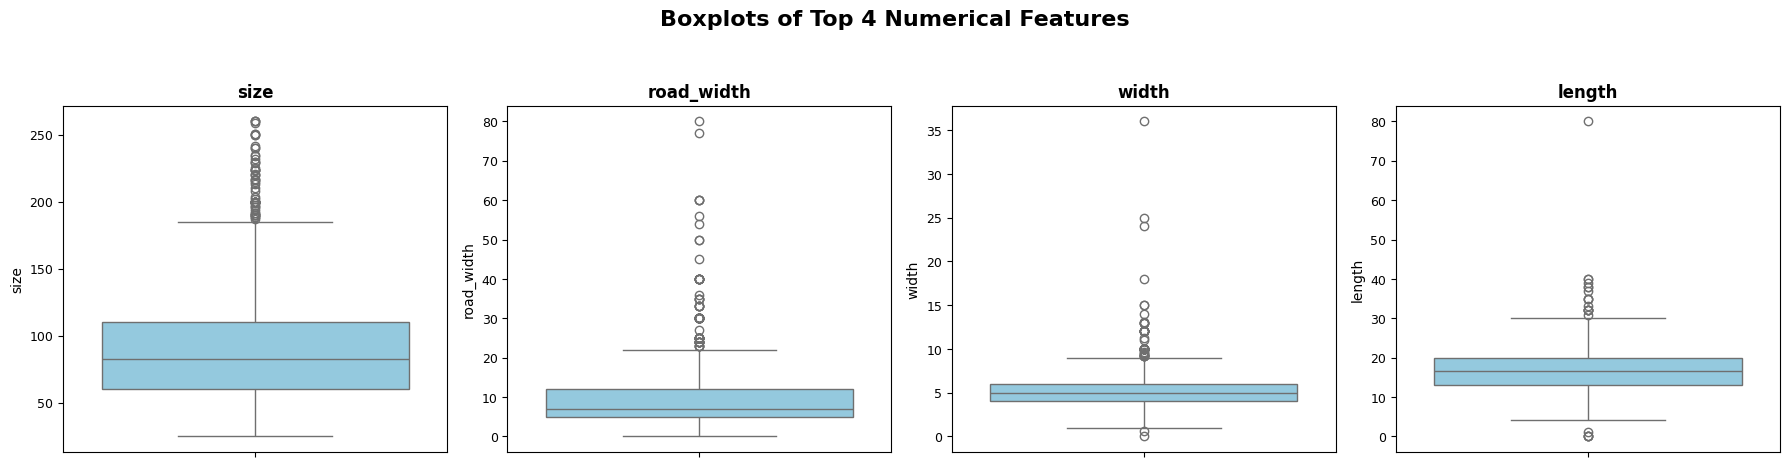

In [56]:
numberic_cols = ['size', 'road_width', 'width', 'length']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numberic_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(numberic_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 4 Numerical Features", fontsize=16, 
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()

In [57]:
numberic_cols = ['size', 'road_width', 'width', 'length']

NumbericScaler = RobustScaler()
NumbericScaler.fit(X_train[numberic_cols])

X_train[numberic_cols] = NumbericScaler.transform(X_train[numberic_cols])
X_test[numberic_cols] = NumbericScaler.transform(X_test[numberic_cols])


# 4. Huấn luyện mô hình sử dụng bộ dữu liệu đã được tiền xử lý trước đó, bộ dữ liệu gồm:
- 1 chỉ số numberic được giữ nguyên: ['num_floors']
- 4 chỉ số numberic được scaler qua chiến lược robus scaler: ['size', 'road_width', 'width', 'length']
- 5 chỉ số book : ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
- Các chỉ số category được 1hot encoder: ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']

In [58]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, minmax_scale
from sklearn.preprocessing import PolynomialFeatures
# Import các model
# simple model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Kiểm tra và lưu kết quả cross-validation cho các mô hình

from sklearn.model_selection import RepeatedKFold, cross_val_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=100),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=5,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        learning_rate=0.01,
        n_estimators=100,
        max_depth=5,
        subsample=0.8,
        random_state=42, 
        verbosity=0
    ),
    # "LightGBM": LGBMRegressor(random_state=42, force_col_wise=True)
    # "CatBoostRegressor": CatBoostRegressor(
    #     iterations=1000, 
    #     learning_rate=0.05, 
    #     depth=6,
    #     early_stopping_rounds=50, 
    #     verbose=0, 
    #     random_state=42,
    #     cat_features=['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
    # )
}

tree_based_models = ["RandomForest", "XGBoost", "LightGBM"] # có thể bổ sung thêm nếu cần

# Danh sách lưu trữ kết quả
results = {
    "Model": [],
    "Train_RMSE": [],
    "Test_RMSE": [],
    "Train_R2": [],
    "Test_R2": [],
    "CV_R2_Mean": [],
    "CV_R2_Std": []
}

# Cross-validation strategy
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

for name, model in models.items():
    # CatBoostRegressor: xử lý riêng với X_train_og và X_test_og
    if name == "CatBoostRegressor":
        cv_scores = cross_val_score(model, X_train_og, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)
        regressor = model.fit(X_train_og, y_train)
        y_train_pred = regressor.predict(X_train_og)
        y_test_pred = regressor.predict(X_test_og)
    # Tree-based models (trừ CatBoost): dùng X_train_encode và X_test_encode
    elif name in tree_based_models:
        cv_scores = cross_val_score(model, X_train_encode, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)
        regressor = model.fit(X_train_encode, y_train)
        y_train_pred = regressor.predict(X_train_encode)
        y_test_pred = regressor.predict(X_test_encode)
    # Các model tuyến tính: truyền vào X_train, X_test thường
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)       
        regressor = model.fit(X_train, y_train)
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        
    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Lưu kết quả
    results["Model"].append(name)
    results["Train_RMSE"].append(train_rmse)
    results["Test_RMSE"].append(test_rmse)
    results["Train_R2"].append(train_r2)
    results["Test_R2"].append(test_r2)
    results["CV_R2_Mean"].append(cv_r2_mean)
    results["CV_R2_Std"].append(cv_r2_std)

# Tổng hợp kết quả vào DataFrame
df_results = pd.DataFrame(results).sort_values(by='Test_R2', ascending=False)
df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2,CV_R2_Mean,CV_R2_Std
1,Ridge,2.851366,2.819983,0.030704,0.044370,-0.003832,0.028051
0,LinearRegression,2.851054,2.822138,0.030916,0.042909,-0.007936,0.031448
2,Lasso,2.855496,2.836874,0.027894,0.032888,0.002422,0.021676
4,XGBoost,2.576669,2.868429,0.208469,0.011254,0.003904,0.018612
3,RandomForest,2.558775,2.873240,0.219425,0.007934,-0.004903,0.032496


Thử poly feature cho các mô hình tuyến tính

In [ ]:
numberic_cols = ['size', 'road_width', 'width', 'length']

poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly = poly_features.fit_transform(X_train[numberic_cols])
test_poly = poly_features.transform(X_test[numberic_cols])

X_train_poly = np.hstack([train_poly, X_train.drop(numberic_cols, axis=1).values])
X_test_poly = np.hstack([test_poly, X_test.drop(numberic_cols, axis=1).values])

In [ ]:
# Tiến hành dự đoán cho model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Danh sách lưu trữ kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và lưu trữ đnash giá cho mô hình
for name, model in models.items():
    
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(model)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Taoj datafame tổng hợp để nhìn 
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by='Test_R2', ascending=False)

df_results

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('nhatot.csv')
data

,title,price,price_per_unit,size,living_area,commercial_type,size_unit,address,land_type,house_type,...,furnishing_sell,direction,balconydirection,floornumber,floors,block,pty_characteristics,width,length,apartment_feature
0,KDC TÂN ĐÔ - CHÍNH CHỦ CẮT LỖ 500 TRIỆU NỀN BI...,"3,3 tỷ","18,86 triệu/m²",175 m²,NaN,NaN,m²,"Đường tỉnh 825, Xã Đức Hòa Hạ, Huyện Đức Hòa, ...",Đất thổ cư,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mặt tiền\nThổ cư toàn bộ\nNở hậu,10 m,17.5 m,NaN
1,RA ĐI LÔ ĐẤT 5X27 GIÁ 577TR GÂN TRUNG TÂM CỦ C...,577 triệu,"4,27 triệu/m²",135 m²,NaN,NaN,m²,"Đường Suối Lội, Xã Tân Thông Hội, Huyện Củ Chi...",Đất thổ cư,NaN,...,NaN,NaN,NaN,NaN,NaN,tân thông hội,Mặt tiền,5 m,27 m,NaN
2,"Bán 200m2 đất sẳn nhà cấp 4, gần chợ hưng long...",750 triệu,"3,75 triệu/m²",200 m²,NaN,NaN,m²,"Đường Đoàn Nguyễn Tuấn, Xã Hưng Long, Huyện Bì...",Đất thổ cư,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 m,20 m,NaN
3,Đất Nền 224m² Bình Phước Thanh Toán 183 Triệu ...,183 triệu,816.964 đ/m²,224 m²,NaN,NaN,m²,"quốc lộ 13, quốc lộ 757,quốc lộ 14C, đt 759b,d...",Đất thổ cư,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mặt tiền\nThổ cư toàn bộ,5 m,45 m,NaN
4,"Đất nền 6x15 khu Compound, sổ sẵn, tiện ích đầ...","1,85 tỷ","20,56 triệu/m²",90 m²,NaN,NaN,NaN,"Đường ĐT. 830, Xã Lương Hòa, Huyện Bến Lức, Lo...",Đất thổ cư,NaN,...,NaN,Bắc,NaN,NaN,NaN,Athena,Mặt tiền\nHẻm xe hơi\nThổ cư toàn bộ,6 m,15 m,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"Bán Vườn 3426m2, Giá 750 triệu, thương lượng, ...",750 triệu,218.914 đ/m²,3426 m²,NaN,NaN,m²,"DH 507, Xã An Linh, Huyện Phú Giáo, Bình Dương",Đất thổ cư,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mặt tiền\nNở hậu,42 m,NaN,NaN
1640,GIÁ CHUẨN 1TY020 TRIỆU 150M2 6X25 SỔ RIÊNG CÁC...,"1,02 tỷ","6,80 triệu/m²",150 m²,NaN,NaN,m²,"Đường Ba Sa, Xã Phước Hiệp, Huyện Củ Chi, Tp H...",Đất thổ cư,NaN,...,NaN,Đông Bắc,NaN,NaN,NaN,NaN,NaN,6 m,25 m,NaN
1641,"BÁN NHÀ ĐẸP LUNG LINH, GIÁP Q1, TẶNG NỘI THẤT ...","4,95 tỷ","141,43 triệu/m²",35 m²,29.4 m²,NaN,NaN,"Đường Xô Viết Nghệ Tĩnh, Phường 21, Quận Bình ...",NaN,"Nhà ngõ, hẻm",...,NaN,NaN,NaN,NaN,NaN,NaN,Hẻm xe hơi,3.3 m,11 m,NaN
1642,"Diện Tích Khủng Trung Tâm Quận Thanh Xuân,Phố ...","13,6 tỷ","226,67 triệu/m²",60 m²,NaN,NaN,NaN,"Phố Tô Vĩnh Diện, Phường Khương Trung, Quận Th...",NaN,"Nhà ngõ, hẻm",...,Hoàn thiện cơ bản,NaN,NaN,NaN,3.0,NaN,Hiện trạng khác,3.1 m,NaN,NaN


In [3]:
data.describe()

,floornumber,floors
count,125.00000,269.000000
mean,12.81600,3.007435
std,12.55079,1.387558
min,1.00000,1.000000
25%,4.00000,2.000000
50%,11.00000,3.000000
75%,18.00000,4.000000
max,88.00000,7.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1644 non-null   object 
 1   price                    1644 non-null   object 
 2   price_per_unit           1644 non-null   object 
 3   size                     1644 non-null   object 
 4   living_area              212 non-null    object 
 5   commercial_type          406 non-null    object 
 6   size_unit                230 non-null    object 
 7   address                  1644 non-null   object 
 8   land_type                416 non-null    object 
 9   house_type               414 non-null    object 
 10  property_legal_document  1644 non-null   object 
 11  property_status          408 non-null    object 
 12  rooms                    822 non-null    object 
 13  toilets                  693 non-null    object 
 14  furnishing_sell         